## **Project Meta Description**

"Develop a cropdisease detection and classification system using YOLOv8 in Google Colab. Leverage deep learning, Roboflow, and Gradio to create an interactive platform for accurate identification of crop diseases in images and videos."

## **Project Short Description**

"This project utilizes YOLOv8 to build a crop disease detection and classification system in Google Colab. The system processes images and videos to identify diseases, providing an interactive interface for real-time analysis using Gradio."

## **crop Disease Detection and Classification Project Documentation**

## **Introduction**
This project aims to develop a system that detects and classifies crop diseases using a deep learning model, specifically YOLOv8. The system is implemented in a Google Colab environment and uses the Roboflow API for dataset management, the Ultralytics library for model training and inference, and Gradio for creating an interactive web interface. This system helps in automating the identification of crop diseases, potentially leading to improved crop management and yield.

### **Mount Google Drive**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mount your Google Drive to access and save datasets, models, and other resources.

## **Installing Necessary Packages**
Installs the roboflow, gradio and ultralytics Python packages. roboflow is used for managing datasets, and ultralytics is used for working with YOLO models.

In [2]:
!pip install roboflow
!pip install ultralytics
!pip install gradio ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using c

## **Downloading the Dataset from Roboflow**
* Initializes a connection to Roboflow using your API key.
* Accesses a specific project in the workspace called "Kataract Object Detection."
* Downloads the third version of this dataset configured for YOLOv8.

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="PYIrYvf8WFPOSaItVRYl")
project = rf.workspace("graduation-project-2023").project("crops-diseases-detection-and-classification")
version = project.version(12)
dataset = version.download("yolov8")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.75, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Plants-Diseases-Detection-and-Classification-12 in yolov8:: 100%|██████████| 5044/5044 [00:43<00:00, 114.96it/s]


## **Imports necessary library**
Imports the ultralytics library and runs a system check to ensure everything is set up correctly for training the model.

In [4]:
import ultralytics
ultralytics.checks()
from PIL import Image
from ultralytics import YOLO
import gradio as gr
import ultralytics
import numpy as np
from cv2 import imread
from matplotlib import pyplot as plt
from matplotlib.image import imread
import cv2
import gradio as gr

Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.7/201.2 GB disk)


Install the Ultralytics library and run system checks to ensure all dependencies are correctly set up.

## **Train the YOLOv8 Model**
* Trains the YOLOv8 model using the YOLOv8n (nano) pre-trained model.
* The dataset configuration is provided via the data.yaml file, and the training runs for 100 epochs with an image size of 640x640 pixels.

In [ ]:
!yolo train model=yolov8n.pt data="/content/drive/MyDrive/new_projects/crops-Diseases-Detection-and-Classification-12/data.yaml" epochs=100 imgsz=640

Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/new_projects/Plants-Diseases-Detection-and-Classification-12/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save

## **Visualizing Training Results**
* This step is useful for visualizing and assessing the performance of your model.

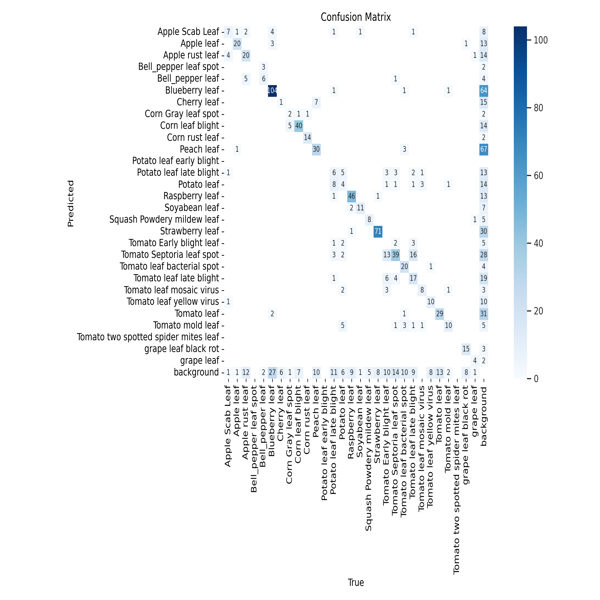

In [ ]:
Image.open(f'/content/drive/MyDrive/new_projects/p6/runs/detect/train3/confusion_matrix.png').resize((600,600))

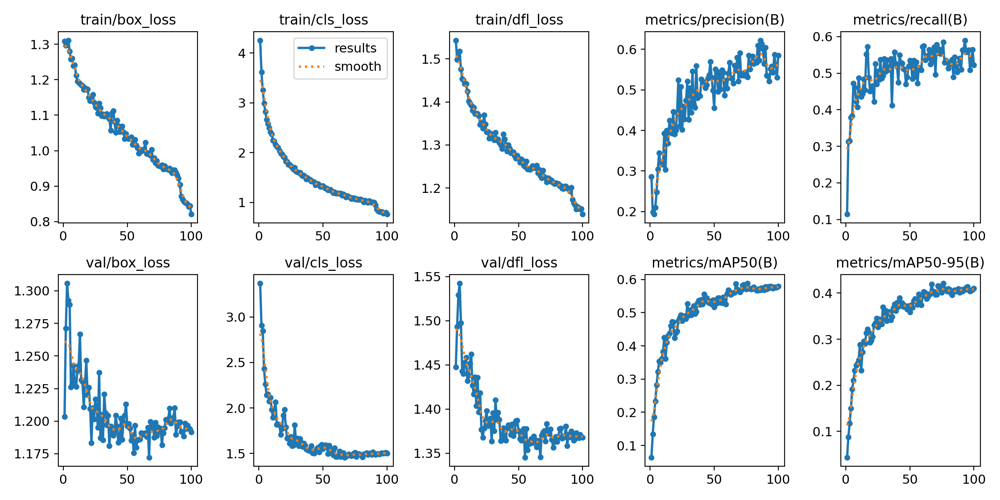

In [ ]:
Image.open(f'/content/drive/MyDrive/new_projects/p6/runs/detect/train3/results.png').resize((1000,500))

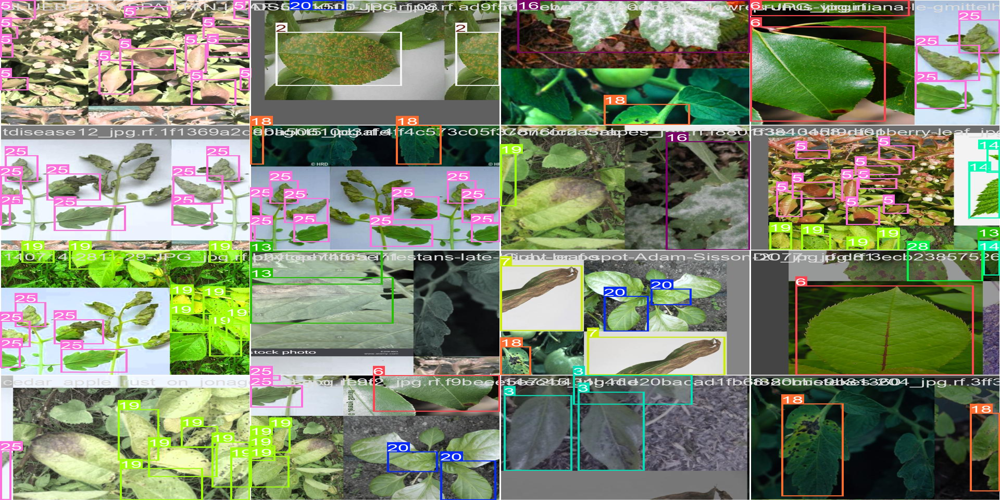

In [ ]:
Image.open(f'/content/drive/MyDrive/new_projects/p6/runs/detect/train3/train_batch1.jpg').resize((1000,500))

After training, visualize the results such as confusion matrix, results summary, and sample training batches.

## **Model Validation**
* Loads the best model (based on training) from the specified directory.
* Runs validation on the model using the validation set and collects various metrics:
 * map: Mean Average Precision across IoU thresholds.
 * map50: Mean Average Precision at IoU threshold 0.50.
 * map75: Mean Average Precision at IoU threshold 0.75.
 * maps: List of per-class mAPs.


In [ ]:
data_yaml_path = '/content/drive/MyDrive/new_projects/p6/crops-Diseases-Detection-and-Classification-12/data.yaml'
model = YOLO('/content/drive/MyDrive/new_projects/p6/runs/detect/train3/weights/best.pt')

metrics = model.val(data=data_yaml_path)

metrics.box.map
metrics.box.map50
metrics.box.map75
metrics.box.maps

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,011,303 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 36.5MB/s]
val: Scanning /content/drive/MyDrive/new_projects/p6/Plants-Diseases-Detection-and-Classification-12/valid/labels... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [02:04<00:00,  2.01it/s]


val: New cache created: /content/drive/MyDrive/new_projects/p6/Plants-Diseases-Detection-and-Classification-12/valid/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.50it/s]


                   all        250        884      0.532      0.584      0.588      0.421
       Apple Scab Leaf          6         14      0.428      0.643      0.499      0.346
            Apple leaf          9         23       0.61      0.913      0.887      0.634
       Apple rust leaf         11         39       0.63      0.538      0.585      0.372
      Bell_pepper leaf          3         11      0.411      0.545      0.562      0.428
        Blueberry leaf         13        140       0.63      0.707      0.695      0.451
           Cherry leaf          2          7      0.056      0.143      0.152      0.091
   Corn Gray leaf spot          8          8      0.397      0.375      0.447      0.356
      Corn leaf blight         25         48      0.687      0.812      0.795      0.538
        Corn rust leaf         13         15      0.878      0.867      0.976      0.788
            Peach leaf          7         47      0.304      0.553      0.405      0.217
Potato leaf late blig

array([     0.3459,     0.63375,     0.37153,       0.421,     0.42814,     0.45065,    0.090963,     0.35641,     0.53809,     0.78824,     0.21677,       0.421,     0.16254,     0.12441,     0.66235,     0.89253,      0.4803,      0.6626,    0.068545,      0.3622,     0.32155,     0.30796,     0.45196,     0.28695,
           0.31476,      0.4586,       0.421,      0.5413,     0.62696])

## **Visualizing Validation Results**

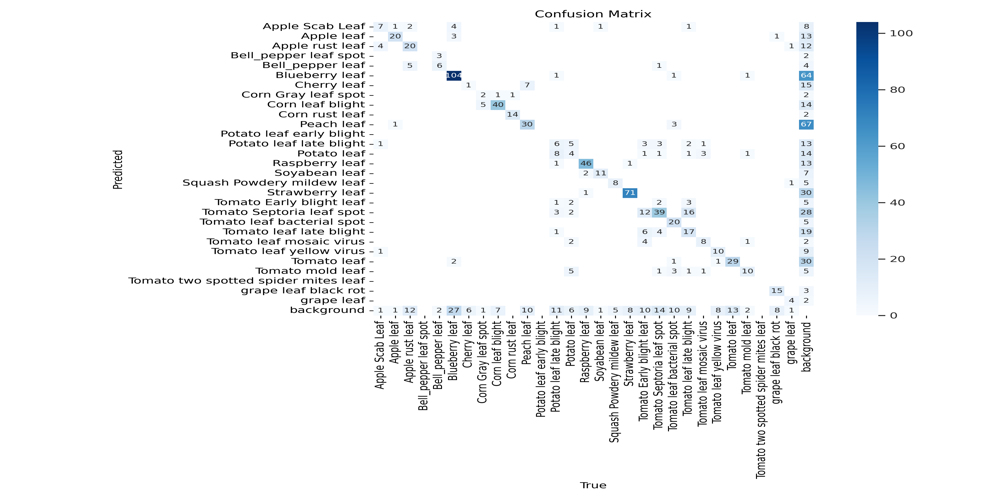

In [ ]:
Image.open(f'/content/drive/MyDrive/new_projects/p6/runs/detect/val/confusion_matrix.png').resize((1000,500))

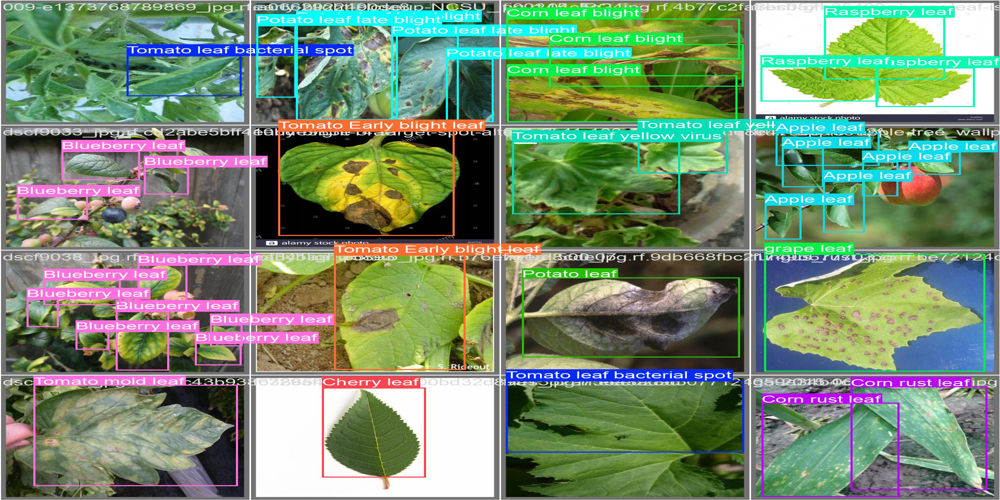

In [ ]:
Image.open(f'/content/drive/MyDrive/new_projects/p6/runs/detect/val/val_batch0_labels.jpg').resize((1000,500))

Display a validation batch with labels to visualize the model's accuracy on unseen data.

## **Image Prediction**
* Loads a trained model and uses it to predict objects in a specific image.
* Saves the prediction and then loads and displays the predicted image using matplotlib

In [ ]:
model = YOLO('/content/drive/MyDrive/new_projects/p6/runs/detect/train3/weights/best.pt')

In [ ]:
results = model('/content/drive/MyDrive/new_projects/p6/crops-Diseases-Detection-and-Classification-12/test/images/022_jpg.rf.db03fecdb4b0082ef982753c6efe4528.jpg',show_conf=False,save=True)


image 1/1 /content/drive/MyDrive/new_projects/p6/Plants-Diseases-Detection-and-Classification-12/test/images/022_jpg.rf.db03fecdb4b0082ef982753c6efe4528.jpg: 640x640 1 Corn Gray leaf spot, 8.5ms
Speed: 5.0ms preprocess, 8.5ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


Run the trained model on a test image to detect and classify crop diseases.

## **Display Predicted Image**

In [ ]:
predicted_img_paths = [
    '/content/drive/MyDrive/new_projects/p6/runs/detect/predict/20809116-standard_jpg.rf.09785317e0a7075baf994a91dfb77da9.jpg',
    '/content/drive/MyDrive/new_projects/p6/runs/detect/predict/11-40580_5_jpg.rf.b4e37bee219d100a1592c704ad29f617.jpg'
]

fig, axes = plt.subplots(nrows=1, ncols=len(predicted_img_paths), figsize=(16, 8))

# Iterate through images and display them in subplots
for i, path in enumerate(predicted_img_paths):
    predicted_img = imread(path)
    axes[i].imshow(predicted_img)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Load and display the predicted image to visualize the model's output.

## **Set Up Gradio Interface for Image and Video Processing**

### **Loading the YOLOv8 Model**

In [5]:
model = YOLO('/content/drive/MyDrive/new_projects/p6/runs/detect/train3/weights/best.pt')

Loads the trained YOLOv8 model from the specified file path. This model will be used to detect objects in both images and videos.

### **Defining the predict_images Function**
### **Input:**
 * List of file paths to the images.

### **Process:**
 * For each image, the function loads the image, converts it to a NumPy array, and then converts it from RGB to BGR (since OpenCV works with BGR format).
 * The image is passed to the YOLO model for object detection.
 * The function loops through the detected objects (boxes), extracting the bounding box coordinates, the class label, and confidence score.
 * Bounding boxes and labels are drawn on the image using OpenCV.
 * The image is then converted back to RGB and added to the output list.

### **Output:**
 A list of processed images with drawn bounding boxes and labels.

In [6]:
def predict_images(filepaths):
    if filepaths is None:
        return []

    output_images = []
    for filepath in filepaths:
        try:
            image = Image.open(filepath)
            img_np = np.array(image)
            img_np_bgr = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)
            results = model(img_np_bgr)

            for result in results[0].boxes:
                x1, y1, x2, y2 = map(int, result.xyxy[0].cpu().numpy())
                label = int(result.cls.cpu().numpy())
                conf = float(result.conf.cpu().numpy())
                label_text = f"{model.names[label]}: {conf:.2f}"

                cv2.rectangle(img_np_bgr, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(img_np_bgr, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

            img_np_rgb = cv2.cvtColor(img_np_bgr, cv2.COLOR_BGR2RGB)
            output_image = Image.fromarray(img_np_rgb)
            output_images.append(output_image)

        except Exception as e:
            print(f"Error: {e}")
            output_images.append(None)

    return output_images


## **Defining the predict_videos Function**
### **Input:**
* File path to the video.

### **Process:**
* Opens the video file using OpenCV and initializes a list to store processed frames.
* A new video writer is set up to save the input video (for display purposes).
* Each frame of the video is read and passed to the YOLO model for object detection.
* Bounding boxes and labels are drawn on each frame for the detected objects.
* The processed frames are saved into a new video file.

### **Output:**
* The path to the processed video file.


In [7]:
def predict_videos(filepath):
    if filepath is None:
        return None, None

    try:
        cap = cv2.VideoCapture(filepath)
        output_frames = []
        temp_input_video_path = '/content/input_video.mp4'

        cap_in = cv2.VideoWriter(temp_input_video_path, cv2.VideoWriter_fourcc(*'mp4v'), 20,
                                 (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

        if not cap.isOpened():
            print("Error: Could not open video.")
            return None, None

        frame_count = 0
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            cap_in.write(frame)

            results = model(frame)

            for result in results[0].boxes:
                x1, y1, x2, y2 = map(int, result.xyxy[0].cpu().numpy())
                label = int(result.cls.cpu().numpy())
                conf = float(result.conf.cpu().numpy())
                label_text = f"{model.names[label]}: {conf:.2f}"

                cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(frame, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

            output_frames.append(frame)
            frame_count += 1

        cap.release()
        cap_in.release()

        if frame_count == 0:
            print("Error: No frames processed.")
            return None, None

        height, width, _ = output_frames[0].shape
        temp_output_video_path = '/content/processed_video.mp4'
        out = cv2.VideoWriter(temp_output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), 20, (width, height))
        for frame in output_frames:
            out.write(frame)
        out.release()

        print("Video processed and saved.")
        return temp_output_video_path

    except Exception as e:
        print(f"Error: {e}")
        return None


### **Defining the process_files Function**
Combines the predict_images and predict_videos functions to handle both images and video:

### **Input:**
* List of image files and a video file.

### **Process:**
Calls the respective functions to process the images and video.


In [8]:
def process_files(images, video):
    output_images = predict_images(images)
    processed_video = predict_videos(video) if video else None
    return output_images, video, processed_video


### **Setting Up the Gradio Interface**
Configures the Gradio interface:
### **Inputs:**
* Multiple image files (gr.File) and a video file (gr.Video) can be uploaded by the user.

### **Outputs:**
* A gallery of processed images, the original video, and the processed video are displayed to the user.

In [9]:
interface = gr.Interface(
    fn=process_files,
    inputs=[gr.File(file_count="multiple", type="filepath", label="Upload Images"),
            gr.Video(label="Upload Video")],
    outputs=[gr.Gallery(label="Output Images"), gr.Video(label="Input Video"), gr.Video(label="Processed Video")],
)


### **Launching the Interface**
Launches the Gradio interface with debugging enabled, allowing users to interact with the system by uploading images and videos, and receiving processed outputs with detected objects.


In [ ]:
interface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://8756ee53589d132224.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)



This code provides a comprehensive solution for detecting objects in both images and videos using a trained YOLOv8 model, all within an easy-to-use web interface.

## **Conclusion**
This project provides a comprehensive approach to automating crop disease detection and classification using deep learning techniques. By leveraging YOLOv8 and integrating tools like Roboflow, Google Colab, and Gradio, the project demonstrates how advanced technologies can be applied in agriculture. The interactive interface created with Gradio allows users to upload and process images and videos easily, making it a user-friendly solution for real-world applications. This system could greatly assist in early disease detection in crops, helping farmers and agricultural professionals to improve crop health and yield.